# 一维梯度下降 gradient descent

假设连续可导的函数f:R->R的输入和输出都是标量。给定绝对值足够小的数ϵ，根据泰勒展开公式，我们得到以下近似：  
```f(x+ϵ)=f(x)+ϵf′(x)```  
这里f′(x)是函数f在x处的梯度。一维函数的梯度是一个标量，也称导数。  


接下来，找到一个常数η>0，使得∣ηf′(x)∣足够小，那么可以将ϵ替换为−ηf′(x)并得到  
```f(x-ηf′(x))=f(x)-ηf′(x)f′(x) ```  
如果导数f′(x)不等于0，那么ηf′(x)f′(x)大于0，所以    
```f(x-ηf′(x))<f(x)```

这意味着，如果通过      
```x -> x-ηf′(x)```  
来迭代x，函数f(x)的值可能会降低。

example:f(x)=x*x

In [3]:
import numpy as np
import torch
import math
import matplotlib.pyplot as plt

def gd(eta):
    x=10
    result=[x]
    for i in range(10):
        x -= eta * 2 * x
        result.append(x)
    print('epoch 10,x:',x)
    return result
res=gd(0.2) 

epoch 10,x: 0.06046617599999997


下面将绘制出自变量x的迭代轨迹。

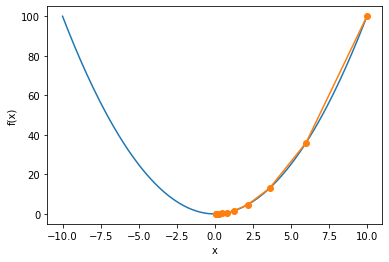

In [4]:
def showTrace(res):
    n = max(abs(min(res)), abs(max(res)), 10)
    f_line = np.arange(-n, n, 0.1)
    
    plt.plot(f_line, [x * x for x in f_line])
    plt.plot(res, [x * x for x in res], '-o')
    plt.xlabel('x')
    plt.ylabel('f(x)')

showTrace(res)

# 学习率

上述梯度下降算法中的正数η通常叫作学习率。  
这是一个超参数，需要人工设定。  


## 如果使用过小的学习率，会导致x更新缓慢从而需要更多的迭代才能得到较好的解。

下面展示使用学习率η=0.05时自变量x的迭代轨迹。

In [5]:
showTrace(gd(0.05))

NameError: name 'show_trace' is not defined

## 如果使用过大的学习率，∣ηf′(x)∣可能会过大从而使前面提到的一阶泰勒展开公式不再成立：这时我们无法保证迭代x会降低f(x)的值。

下面展示使用学习率η=1.1时自变量x的迭代轨迹。

epoch 10,x: 61.917364224000096


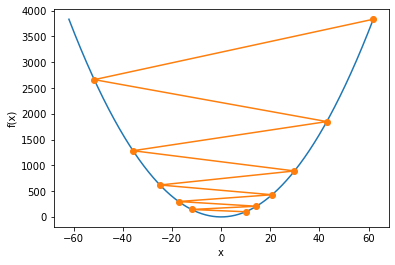

In [9]:
show_trace(gd(1.1))

# 多维梯度下降

第一个函数使用给定的自变量更新函数

epoch 20,x1: -0.057646075230342354 x2: -7.312316880125945e-05


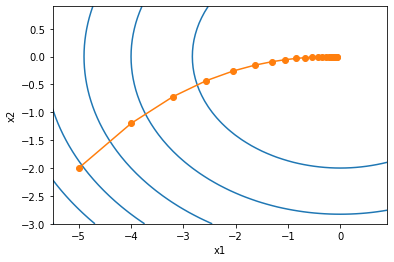

In [16]:
eta = 0.1
def gd2d(x1, x2, s1, s2):
    return (x1 - eta * 2 * x1, x2 - eta * 4 * x2, 0, 0)

def f2d(x1, x2):  # 目标函数
    return x1 ** 2 + 2 * x2 ** 2

def train2D(trainer):
    x1,x2,s1,s2=-5,-2,0,0
    result=[(x1,x2)]
    for i in range(20):
        x1,x2,s1,s2=trainer( x1,x2,s1,s2)
        result.append((x1,x2))
    print('epoch 20,x1:',x1,'x2:',x2)
    return result

def showTrace2D(f, results):  # 本函数将保存在d2lzh_pytorch包中方便以后使用
    plt.plot(*zip(*results), '-o', color='#ff7f0e')
    x1, x2 = np.meshgrid(np.arange(-5.5, 1.0, 0.1), np.arange(-3.0, 1.0, 0.1))
    plt.contour(x1, x2, f(x1, x2), colors='#1f77b4')
    plt.xlabel('x1')
    plt.ylabel('x2')

showTrace2D(f2d, train2D(gd2d))

# 随机梯度下降 stochastic gradient descent（SGD）

In [20]:
def sgd2d(x1, x2, s1, s2):
    return (x1 - eta * (2 * x1 + np.random.normal(0.1)),
            x2 - eta * (4 * x2 + np.random.normal(0.1)), 0, 0)

epoch 20,x1: 0.027038984802646854 x2: -0.08174321532475304


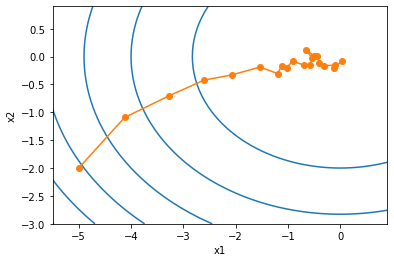

In [21]:
showTrace2D(f2d, train2D(sgd2d))